In [ ]:
print("hau")

In [ ]:
# import requests

# url = "https://live-stock-market.p.rapidapi.com/v1/index/chart"

# querystring = {"symbol":"^GSPC","interval":"1d","range":"ytd","period1":"1399827600","period2":"1709176300"}

# headers = {
# 	"x-rapidapi-key": "4d16749696msh51e126324a40fedp150564jsn4fbb3897bd49",
# 	"x-rapidapi-host": "live-stock-market.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# print(response.json())

In [ ]:
# import requests


# url = "https://real-time-finance-data.p.rapidapi.com/market-trends"

# querystring = {"trend_type":"MARKET_INDEXES","country":"us","language":"en"}

# headers = {
# 	"x-rapidapi-key": "4d16749696msh51e126324a40fedp150564jsn4fbb3897bd49",
# 	"x-rapidapi-host": "real-time-finance-data.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# d = response.json()

# d

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- <meta http-equiv="refresh" content="600" /> -->
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
<meta content="300" http-equiv="refresh"/>
<title>Sensex Streamer Live: Live Stock/Share Price, Indian Market Indices, Indian Share/Stock Market Indices,NIFTY Top 50 Companies,Best Blue Chip Companies in India - Moneycontrol Terminal</title>
<link href="https://images.moneycontrol.com/images/responsive/common/apple-touch-icon.png" rel="apple-touch-icon"/>
<meta content="Latest value of Indian Market Indices - BSE &amp; NSE from Indian stock/share market, Live Nifty 50, BSE Sensex Midcap and Small cap values, Live Indices, market quotes &amp; prices, % change, volume &amp; more at Moneycontrol.com." name="description"/>
<meta content="Indian Indices, Indian Market Indices, Indian Sto
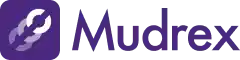
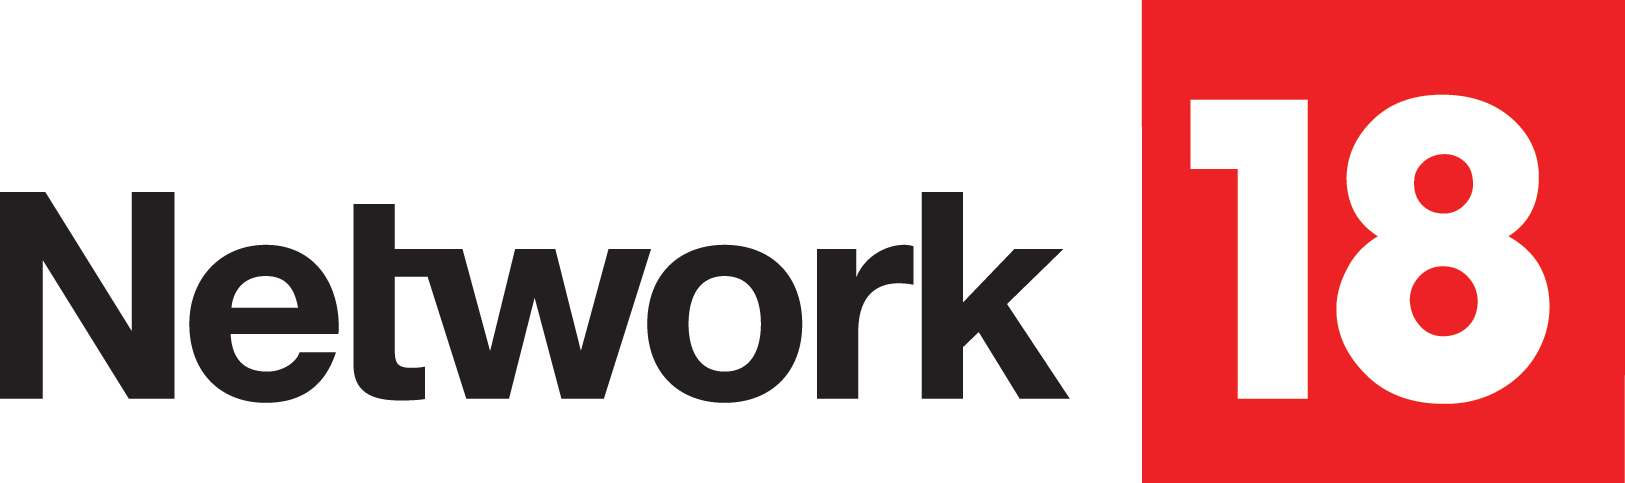

In [149]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import pytz

# Define IST timezone
ist = pytz.timezone("Asia/Kolkata")

# Get current time in IST
current_time_ist = datetime.now(ist)
current_time_ist = current_time_ist.strftime("%Y-%m-%d %H:%M:%S")

url = 'https://www.moneycontrol.com/markets/indian-indices/'



data = requests.get(url)
soup = BeautifulSoup(data.text, 'html.parser')

print(soup)


    



In [155]:
c_name = []
g = soup.find_all('a', class_= "barLink")

# print(g)
for i in g :

    c = i.text
    c_name.append(c)

#     # name  i.find('a', class_= "barLink")
#     # print(name)

# print(c_name)
print(c_name)




['Wipro', 'HCL Tech', 'TCS', 'Infosys', 'Bharti Airtel', 'ONGC', 'Tata Steel', 'Tech Mahindra', 'NTPC', 'Hindalco', 'Larsen', 'JSW Steel', 'Grasim', 'IndusInd Bank', 'Coal India', 'Shriram Finance', 'Adani Ports', 'ICICI Bank', 'Bajaj Finserv', 'Reliance', 'Power Grid Corp', 'Apollo Hospital', 'UltraTechCement', 'HDFC Life', 'HDFC Bank', 'Adani Enterpris', 'SBI', 'Tata Motors', 'Bajaj Auto', 'SBI Life Insura', 'Britannia', 'Bajaj Finance', 'Asian Paints', 'Sun Pharma', 'Titan Company', 'TATA Cons. Prod', 'BPCL', 'HUL', 'M&M', 'Dr Reddys Labs', 'Eicher Motors', 'Hero Motocorp', 'Kotak Mahindra', 'Trent', 'Nestle', 'ITC', 'Maruti Suzuki', 'Axis Bank', 'Bharat Elec', 'Cipla']


In [152]:
ltp = soup.find_all('tr')

data = []

# print(len(ltp))
# print(ltp.text)

for i in ltp:

    row = i.text
    print(row)
    data.append(row)


processed_data = list(map(lambda x: x.strip().split("\n"), data))
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

columns = {'Stock Name', 'Sector'}
c = pd.DataFrame(processed_data, columns = ["stock_name", "sector",'ltp', 'change','%cng' ])





Stock Name
Sector 
LTP 
Change 
%Chg

No Data

Stock Name
Sector 
LTP 
Change 
%Chg


Wipro
Computers - Software
295.05
-11.30
-3.69


HCL Tech
Computers - Software
1,644.05
-56.65
-3.33


Stock Name
Sector 
LTP 
Change 
%Chg


TCS
Computers - Software
3,675.60
-110.40
-2.92


Infosys
Computers - Software
1,764.10
-50.90
-2.8


Bharti Airtel
Telecommunications - Service
1,601.30
-37.95
-2.32


ONGC
Oil Drilling And Exploration
234.35
-5.55
-2.31


Tata Steel
Iron & Steel
137.65
-3.11
-2.21


Tech Mahindra
Computers - Software
1,613.70
-35.80
-2.17


NTPC
Power - Generation & Distribution
320.10
-6.15
-1.89


Hindalco
Iron & Steel
641.90
-11.65
-1.78


Larsen
Infrastructure - General
3,257.70
-57.40
-1.73


JSW Steel
Steel - Large
966.80
-15.10
-1.54


Grasim
Diversified
2,393.70
-37.35
-1.54


IndusInd Bank
Banks - Private Sector
1,029.15
-14.60
-1.4


Coal India
Mining & Minerals
364.80
-5.15
-1.39


Shriram Finance
Finance - Leasing & Hire Purchase
577.20
-7.90
-1.35


Adani Ports


In [154]:
processed_data = list(map(lambda x: x.strip().split("\n"), data))
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)


c = pd.DataFrame(processed_data, columns = ["stock_name", "sector",'ltp', 'change','%cng' ])
# print(c
newdata = c.dropna()
newdata['date&time'] = current_time_ist

newdata


C:\Users\haesh\AppData\Local\Temp\ipykernel_4912\635253243.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['date&time'] = current_time_ist


,stock_name,sector,ltp,change,%cng,date&time
1,Stock Name,Sector,LTP,Change,%Chg,2025-02-25 02:19:49
3,Stock Name,Sector,LTP,Change,%Chg,2025-02-25 02:19:49
4,Wipro,Computers - Software,295.05,-11.30,-3.69,2025-02-25 02:19:49
5,HCL Tech,Computers - Software,"1,644.05",-56.65,-3.33,2025-02-25 02:19:49
6,Stock Name,Sector,LTP,Change,%Chg,2025-02-25 02:19:49
7,TCS,Computers - Software,"3,675.60",-110.40,-2.92,2025-02-25 02:19:49
8,Infosys,Computers - Software,"1,764.10",-50.90,-2.8,2025-02-25 02:19:49
9,Bharti Airtel,Telecommunications - Service,"1,601.30",-37.95,-2.32,2025-02-25 02:19:49
10,ONGC,Oil Drilling And Exploration,234.35,-5.55,-2.31,2025-02-25 02:19:49
11,Tata Steel,Iron & Steel,137.65,-3.11,-2.21,2025-02-25 02:19:49


In [ ]:
c.columns

In [162]:
# c.isnull().sum()

# newdata.dropna()

o = newdata[newdata['stock_name'] == 'Stock Name'].index

newdata.drop(o, inplace = True)
newdata = newdata.reset_index()

newdata

,level_0,index,stock_name,sector,ltp,change,%cng,date&time,"(ltp,)"
0,0,4,Wipro,Computers - Software,295.05,-11.30,-3.69,2025-02-25 02:19:49,295.05
1,1,5,HCL Tech,Computers - Software,1644.05,-56.65,-3.33,2025-02-25 02:19:49,1644.05
2,2,7,TCS,Computers - Software,3675.60,-110.40,-2.92,2025-02-25 02:19:49,3675.60
3,3,8,Infosys,Computers - Software,1764.10,-50.90,-2.80,2025-02-25 02:19:49,1764.10
4,4,9,Bharti Airtel,Telecommunications - Service,1601.30,-37.95,-2.32,2025-02-25 02:19:49,1601.30
5,5,10,ONGC,Oil Drilling And Exploration,234.35,-5.55,-2.31,2025-02-25 02:19:49,234.35
6,6,11,Tata Steel,Iron & Steel,137.65,-3.11,-2.21,2025-02-25 02:19:49,137.65
7,7,12,Tech Mahindra,Computers - Software,1613.70,-35.80,-2.17,2025-02-25 02:19:49,1613.70
8,8,13,NTPC,Power - Generation & Distribution,320.10,-6.15,-1.89,2025-02-25 02:19:49,320.10
9,9,14,Hindalco,Iron & Steel,641.90,-11.65,-1.78,2025-02-25 02:19:49,641.90


In [161]:
# columns = ['last_update_utc','exchange_open','exchange_close']


# dt[['last_update_utc','exchange_open','exchange_close']] = dt[['last_update_utc','exchange_open','exchange_close']].apply(pd.to_datetime)

# newdata['ltp'] = pd.to_numeric(newdata['ltp'])

newdata['ltp'] = newdata['ltp'].str.replace(",", "").astype(float)
newdata[['change', '%cng']] = newdata[['change', '%cng']].replace(",", "").astype(float)

newdata['date&time'] = newdata['date&time'].astype('datetime64[ns]')

# newdata['time'] = datetime.now()


In [160]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       50 non-null     int64         
 1   stock_name  50 non-null     object        
 2   sector      50 non-null     object        
 3   ltp         50 non-null     object        
 4   change      50 non-null     float64       
 5   %cng        50 non-null     float64       
 6   date&time   50 non-null     datetime64[ns]
 7   (ltp,)      50 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 3.3+ KB


In [129]:
newdata.head(5)

,level_0,index,stock_name,sector,ltp,change,%cng
0,0,6,HDFC Bank,Banks - Private Sector,1687.10,-40.10,-2.32
1,1,7,Maruti Suzuki,Auto - Cars & Jeeps,12440.65,-245.50,-1.94
2,2,8,Tech Mahindra,Computers - Software,1657.85,-27.95,-1.66
3,3,9,TATA Cons. Prod,Plantations - Tea & Coffee,1008.90,-16.40,-1.60
4,4,10,HCL Tech,Computers - Software,1687.55,-24.75,-1.45


In [144]:
from datetime import datetime

current_time = datetime.now()
newdata['time']

2025-02-22 15:24:52.891957


In [131]:
newdata.isnull().sum()

level_0       0
index         0
stock_name    0
sector        0
ltp           0
change        0
%cng          0
dtype: int64

In [133]:
if newdata.isnull().any().any() >= 0:
    print("ther is no null")
else:
    print("there are nulls")

ther is no null


In [145]:
!pip install pytz
from datetime import datetime
import pytz

# Define IST timezone
ist = pytz.timezone("Asia/Kolkata")

# Get current time in IST
current_time_ist = datetime.now(ist)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [148]:
current_time_ist = current_time_ist.strftime("%Y-%m-%d %H:%M:%S")

current_time_ist

'2025-02-25 01:59:04'

In [178]:
import pyodbc
import mysql.connector

conn = mysql.connector.connect(
     host="127.0.0.1", 
    # port= 3306,
     port= 3333,
    
    # host="localhost",         
    user="root",       # give your sql userid
    password= 'root',   # give your sql password
    database="test"    #your database name   
    
)

In [179]:
conn

In [180]:
cursor = conn.cursor()


# create a databse

cursor.execute('create database if not exists test')
# Commit the changes
conn.commit()



In [181]:
dt

NameError: name 'dt' is not defined

In [ ]:
dt.info()

In [182]:
cursor = conn.cursor()

# stock_name", "sector",'ltp', 'change','%cng'

cursor.execute('''create table if not exists mstocks (

               stock_name varchar(100),
               sector varchar(100),
               ltp float(50),
               changes float(50),
               cng float(50),
               dateandtime datetime
         );''')

conn.commit()

# Close the connection
# conn.close()


In [183]:
conn.commit()

In [184]:
cursor = conn.cursor()
for index, i in newdata.iterrows():
    sql = "insert into mstocks(stock_name,sector,ltp,changes,cng,dateandtime) values(%s,%s,%s,%s,%s,%s)"
    val = (i['stock_name'],	i['sector'],i['ltp'],i['change'],i['%cng'],i['date&time'])
    
    cursor.execute(sql, val)
    print(val)
conn.commit()

ProgrammingError: Failed processing format-parameters; Python 'timestamp' cannot be converted to a MySQL type

In [137]:
# Close the connection
conn.close()